In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward decision boundary visualization
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

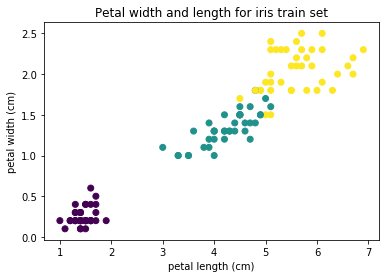

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width and length for iris train set")
plt.savefig("irisSimpleScatter.png", bbox_inches="tight")
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # http://www.graphviz.org/

dt_clf = DecisionTreeClassifier(criterion = "gini",
                                splitter = "best",
                                max_depth = None,
                                min_samples_split = 2, # float uses proportion of total samples
                                min_samples_leaf = 1,
                                min_weight_fraction_leaf = 0,
                                max_features = None, # int, float, 'auto', 'sqrt', 'log2'
                                max_leaf_nodes = None,
                                random_state = None,
                                min_impurity_decrease = 0.0,
                                class_weight = None, # 'balanced', list, or dict, (list of dicts for multi-output/label)
                                ccp_alpha = 0.0
                               )
dt_clf.fit(X_train, y_train)
export_graphviz(
                dt_clf, out_file="D_tree_iris.dot", feature_names=data.feature_names[2:],
                class_names=data.target_names, rounded=True, filled=True
                )
# dot -Tpng D_tree_iris.dot -o D_tree_iris.png

In [12]:
dt_clf.feature_importances_

array([0.53692494, 0.46307506])

In [6]:
def plotDecisionBoundary(svc, X, y, X_train, y_train, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    ax.scatter(X[:, 0],X[:, 1],c=y, cmap=plt.cm.cool)
    ax.set_xlabel(data["feature_names"][2])
    ax.set_ylabel(data["feature_names"][3])
    ax.set_title(title)
    

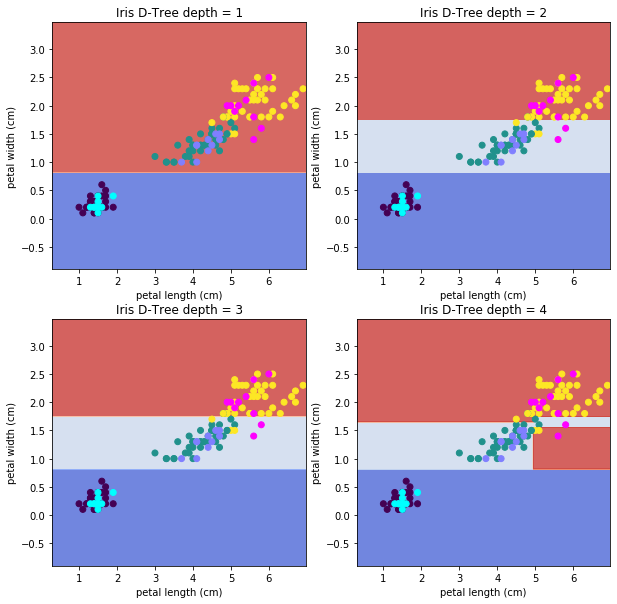

In [7]:
fig = plt.figure(figsize=(10,10))
max_depth = 1
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 1)
    dt_clf.fit(X_train, y_train)
    plotDecisionBoundary(dt_clf, X_test, y_test, X_train, 
                         y_train, title=f"Iris D-Tree depth = {max_depth}", ax=ax)
    max_depth += 1
plt.show()

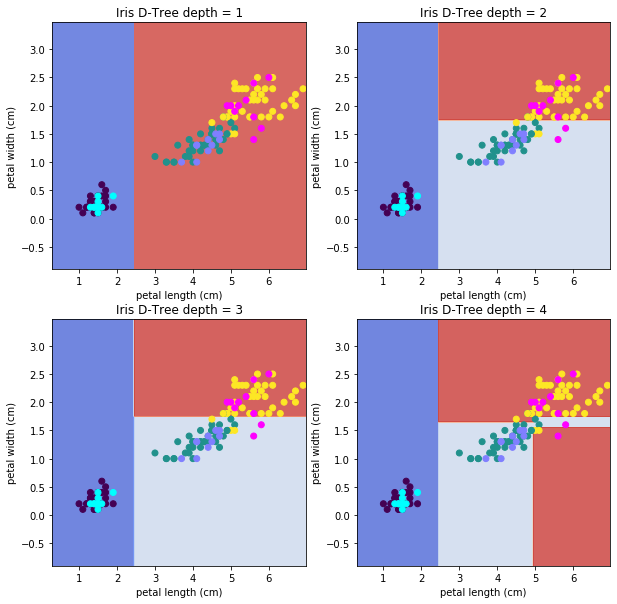

In [8]:
fig = plt.figure(figsize=(10,10))
max_depth = 1
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 45)
    dt_clf.fit(X_train, y_train)
    plotDecisionBoundary(dt_clf, X_test, y_test, X_train, 
                         y_train, title=f"Iris D-Tree depth = {max_depth}", ax=ax)
    max_depth += 1
plt.show()